In [1]:
import pandas as pd # data manipulation , analysis, cleaning 
import numpy as np # mathematical calculations

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [2]:
country_wise = pd.read_csv('data/country_wise_latest.csv')
day_wise = pd.read_csv('data/day_wise.csv')
worldometer_data = pd.read_csv('data/worldometer_data.csv')
DD_CW1 = pd.read_csv('data/full_grouped.csv')
DD_CW2 = pd.read_csv('data/covid_19_clean_complete.csv')
usa = pd.read_csv('data/usa_county_wise.csv')

### Country wise Analysis

In [3]:
country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [10]:
country_wise.shape

TypeError: 'int' object is not subscriptable

In [4]:
country_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [12]:
country_wise.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

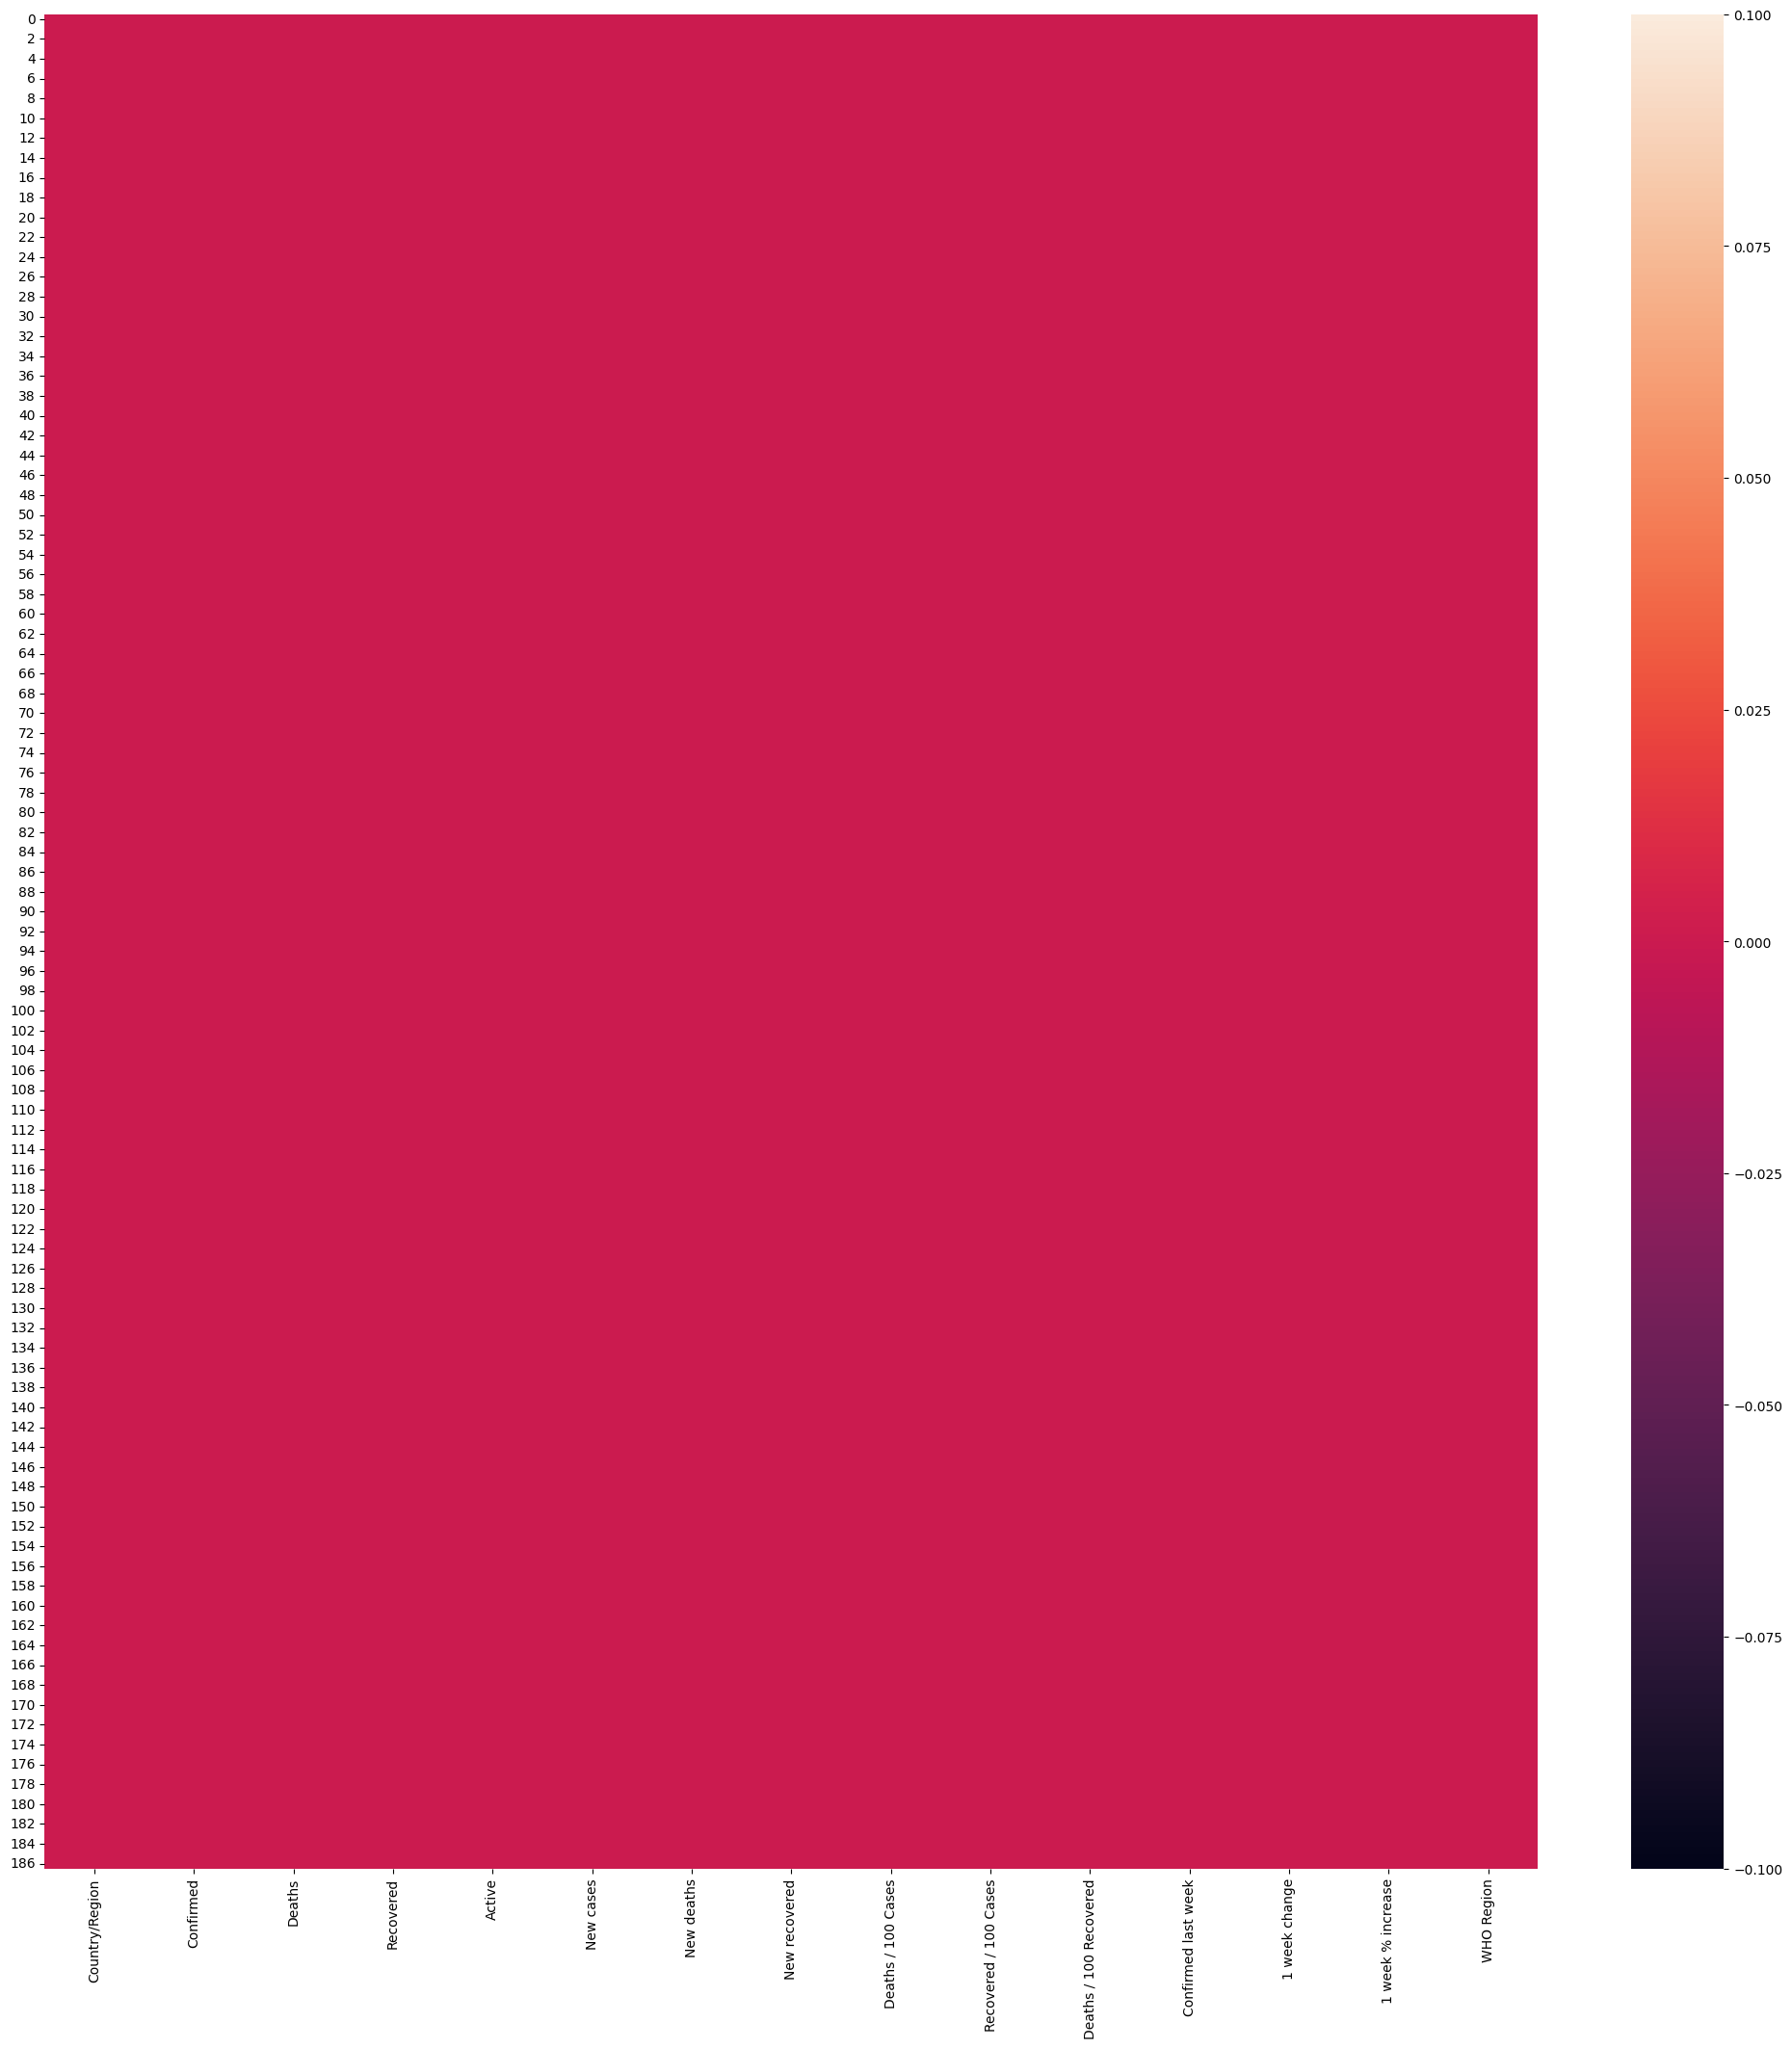

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(country_wise.isnull())
plt.show

In [15]:
missing_value_percent = country_wise.isnull().sum() / country_wise.shape[0] * 100
print(missing_value_percent)

Country/Region            0.0
Confirmed                 0.0
Deaths                    0.0
Recovered                 0.0
Active                    0.0
New cases                 0.0
New deaths                0.0
New recovered             0.0
Deaths / 100 Cases        0.0
Recovered / 100 Cases     0.0
Deaths / 100 Recovered    0.0
Confirmed last week       0.0
1 week change             0.0
1 week % increase         0.0
WHO Region                0.0
dtype: float64


In [17]:
missing_value_column = missing_value_percent[missing_value_percent ==0].keys()
print(missing_value_column)
'''
The code is used to identify the columns in a dataset that have missing values␣
↪exceeding 17%.
It retrieves the keys (column names) from the `missing_value_percent`␣
↪dictionary where the corresponding values
are greater than 17%.
'''


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


'\nThe code is used to identify the columns in a dataset that have missing values␣\n↪exceeding 17%.\nIt retrieves the keys (column names) from the `missing_value_percent`␣\n↪dictionary where the corresponding values\nare greater than 17%.\n'

In [ ]:
data1 = country_wise.drop(columns = missing_value_column)


In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(country_wise.isnull())
plt.show()
'''
The code is used to get visualization of the missing values after removing␣
↪columns
where the missing values exceed 17% of the total data in those columns.
'''


In [ ]:
country_wise = country_wise.dropna() # deleting missing value rows.

In [18]:
country_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [19]:
country_wise.select_dtypes(include=['int64','float64']).columns # Checking the column-names of numerical DataFrame.

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
       'Deaths / 100 Recovered', 'Confirmed last week', '1 week change',
       '1 week % increase'],
      dtype='object')

In [20]:
num_var =['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
       'Deaths / 100 Recovered', 'Confirmed last week', '1 week change',
       '1 week % increase']

C:\Users\ABS RAKIB\AppData\Local\Temp\ipykernel_24120\2094301463.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(country_wise[var], bins=20)
C:\Users\ABS RAKIB\AppData\Local\Temp\ipykernel_24120\2094301463.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(country_wise[var], bins=20)
C:\Use

ValueError: supplied range of [0.0, inf] is not finite

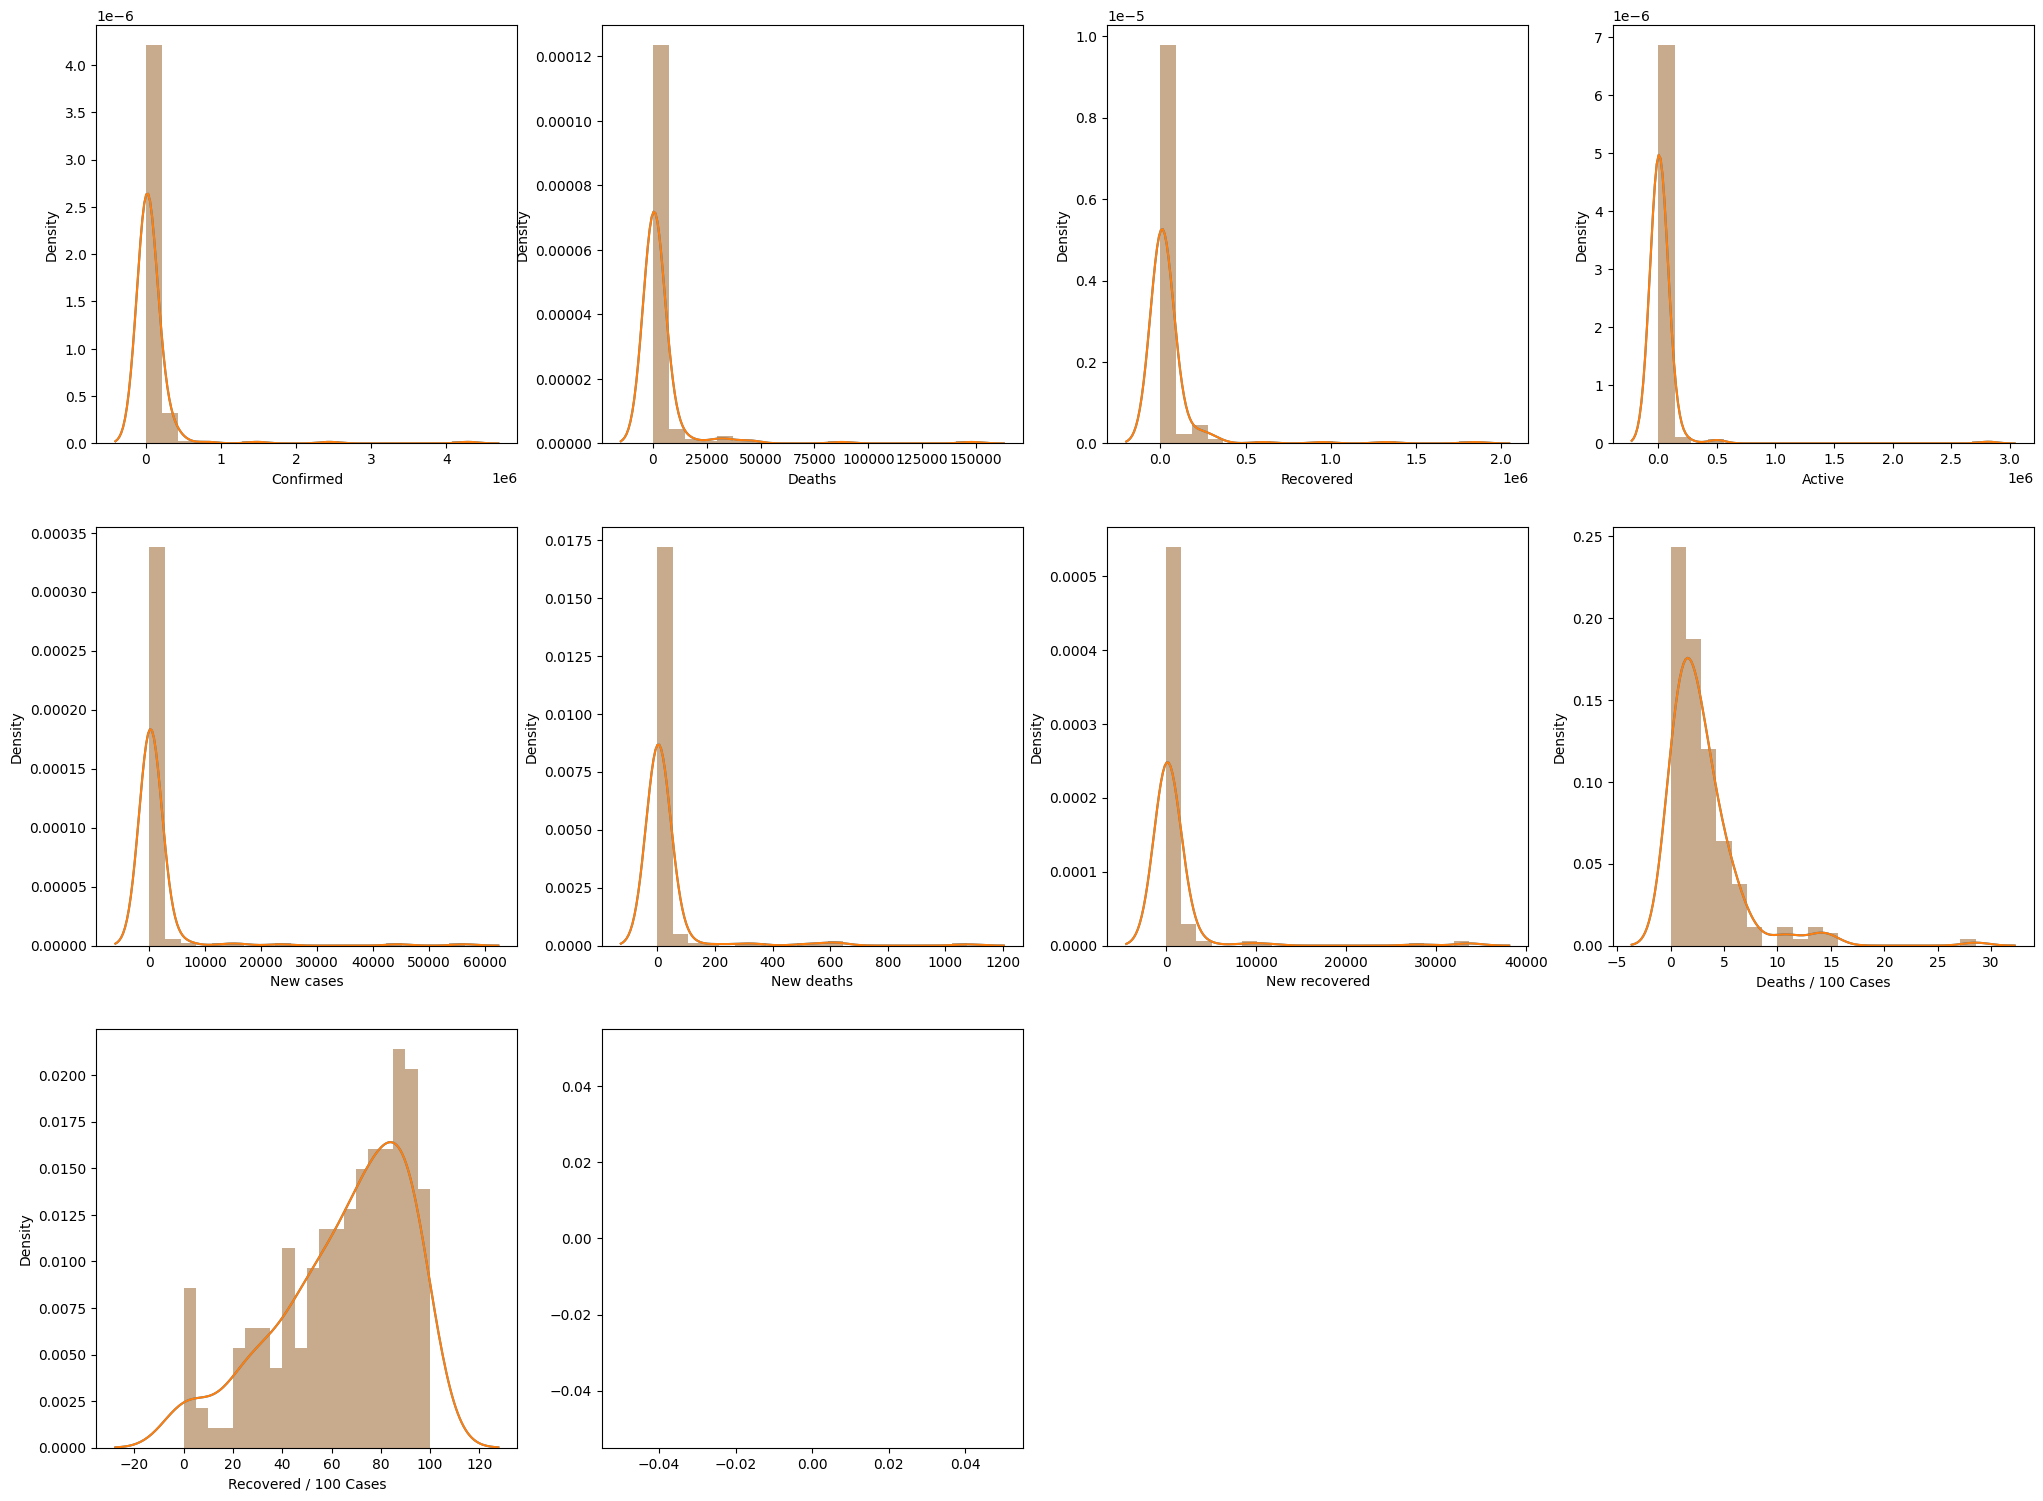

In [21]:
plt.figure(figsize=(25,25))
# Calculate the number of rows and columns for the subplots
num_rows = (len(num_var) + 3) // 4 # Adjust the number of columns as needed
num_cols = 4
for i, var in enumerate(num_var):
    plt.subplot(num_rows, num_cols, i+1)
    sns.distplot(country_wise[var], bins=20)
    sns.distplot(country_wise[var], bins=20)
plt.tight_layout() # Optional: Adjusts the spacing between subplots
plt.show()
